# Intro

I want to answer and do analysis around the question: What factors made people more likely to survive the Titanic?

I think that the most likely factors to contribute to survival are Sex, Age, Pclass.

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

titanic_df = pd.read_csv('titanic-data.csv')

In [83]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# DATA WRANGLING


After looking at the data, I noticed that there were 177 missing 'Age' values, 2 missing 'Embarked' values, and 687 missing 'Cabin' values. I wasn't interested too much in cabin so I decided to omit that column. I decided to also get rid of the rows with missing Age and Embarked values before exploring the data. After doing some research, I realized that  first off, trying to impute these missing values would be beyond the scope of this project, and also using the mean as a substitute for these missing values would change my resulting analysis. 

In [84]:
titanic_df.head(n=10)

del titanic_df['Cabin']

In [85]:
titanic_df = titanic_df.dropna(axis=0)

titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [96]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 86.8+ KB


Populating the interactive namespace from numpy and matplotlib


,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


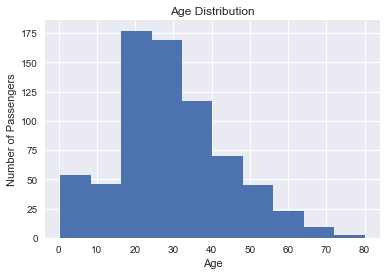

In [86]:
%pylab inline
age_hist = titanic_df['Age'].hist()
age_hist.set_ylabel('Number of Passengers')
age_hist.set_xlabel('Age')
age_hist.set_title('Age Distribution')
pd.DataFrame(titanic_df['Age'].describe())

After looking at the age distribution, I noticed that it was positively skewed. Also, I calculated for outliers:

Lower outlier = 20 - 1.5 * 18 = -7
Upper outlier = 38 + 1.5 * 18 = 65

The people above the age of 65 were outliers. 

As I mentioned before, there would be no way to get the missing Age data, but I also don't think it will be a problem since there are hundreds of known ages, I don't think the missing data would skew the distribution that much even if it were known. Preliminary thoughts: If survival were random, I'd assume people around the age of 20-40 probably survive the most. 

Next, I looked at the second factor which is Sex and I made a plot. I noticed there were double the amount of Men than Women aboard the Titanic. If survival were completely random, I would assume more men survived than women just by look at this breakdown. These are my preliminary thoughts before a deeper dive into the data. 

,PassengerId
Sex,
female,259
male,453


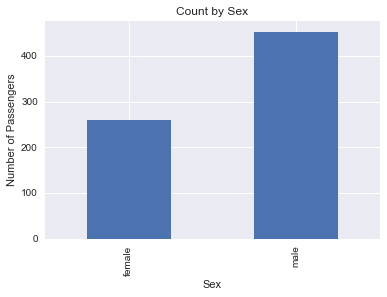

In [100]:
sex_graph = titanic_df.groupby(['Sex']).count()['PassengerId']
sex_graph.plot(kind='bar', title = 'Count by Sex').set_ylabel('Number of Passengers')
titanic_df.groupby(['Sex'])[['PassengerId']].count()

My final preliminary analysis in the data wrangling portion of this will be looking at Pclass. So I made a plot to analyze it as well. From the graph it looks like most of the passengers are in Class 3. If survival were random, I'd assume Class 3 has the most survivers with Class 1 and 2 with a bit less than half of those of Class 3. 

,PassengerId
Pclass,
1,184
2,173
3,355


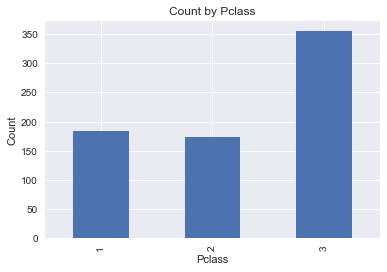

In [101]:
class_graph = titanic_df.groupby(['Pclass']).count()['PassengerId']
class_graph.plot(kind='bar', title = 'Count by Pclass').set_ylabel('Count')
titanic_df.groupby(['Pclass'])[['PassengerId']].count()

# DATA EXPLORATION

After finishing preliminary analysis and data wrangling, I began to actually explore the data a little more.

First I looked at Age:

In [89]:
#group the data by Survived
survived_group = titanic_df.groupby('Survived')

#look at the mean age difference
#print survived_group.info()['Age']

titanic_df.groupby(['Survived'])[['Age']].describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         288.0  28.193299  14.859146  0.42  19.0  28.0  36.0  80.0

After taking a look at the mean age of the two survival groups, I found it interesting that they were so similar
and even the variability was similar. I thought for sure there should age would have a coorelation with survival
so I did a bit more analysis and made a plot of the survivers by age and standardized it.

Populating the interactive namespace from numpy and matplotlib


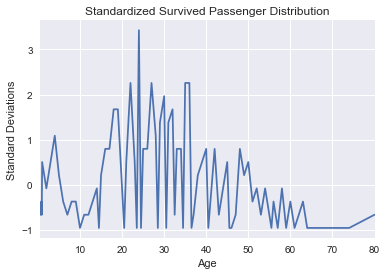

In [90]:
%pylab inline
group_age = titanic_df.groupby('Age')
survive_age = group_age.sum()['Survived']
standardize = (survive_age - survive_age.mean()) / survive_age.std() 
stan_hist = standardize.plot()
stan_hist.set_ylabel('Standard Deviations')
stan_hist.set_title('Standardized Survived Passenger Distribution')

After looking at the plot, I still couldn't conclude that age was a huge factor in survival in the Titanic.
It seemed that there were only a few ages that had a std above 2. Even though
most of the people that survived were between ~(18-35) it wasn't enough for me to be convinced because the mean age of ALL of the riders could have been around that range in the first place. So I took a look below:

In [91]:
titanic_df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Sure enough, taking a look at the data above, it seemed like most all the people on the Titanic were around that age anyway.

Then I moved on to looking at Pclass. I didn't really know if this would be a factor but honestly I was just curious to see if there would be anything interesting that I could find. I grouped the data by Pclass and looked at survival rates.

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         184.0  0.652174  0.477580  0.0  0.0  1.0  1.0  1.0
2         173.0  0.479769  0.501041  0.0  0.0  0.0  1.0  1.0
3         355.0  0.239437  0.427342  0.0  0.0  0.0  0.0  1.0

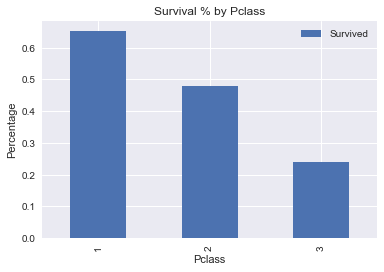

In [102]:
group_pclass = titanic_df.groupby(['Pclass'])[['Survived']].mean()
group_pclass.plot(kind='bar', title = 'Survival % by Pclass').set_ylabel('Percentage')
titanic_df.groupby(['Pclass'])[['Survived']].describe()
#print group_pclass.describe()['Survived']


WOAH! That's so interesting! I thought that ticket class ('A proxy for socio-economic status (SES)' according to kaggle) would be irrelevant to survival. In the eyes of death, I assumed humans would be less shallow that that! Haha jk. In my primary analysis the figures were almost reverse with Class 3 being the highest and class 1 and 2 less than half board the Titanic. The variabilities on each class were pretty high though so that makes me more skeptical of a STRONG relationship between the classes and survival even though 1st class vs 3rd class is pretty different. One thing that we don't know is the physical location of the passengers in each class. This could explain these results. If we assume that the Class 1 passengers were closer to the life boats and the Class 3 passengers were all in the bottom floors of the boat, it would make sense that the Class 1 passengers survived more than the Class 3 since they could have gotten trapped near the bottom of the boat. Just a possibility. 

I wish to know more! But first I'll look at some other factors: Sex.

So I grouped the data by Sex and took a look at the average survival rates. 

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    259.0  0.752896  0.432163  0.0  1.0  1.0  1.0  1.0
male      453.0  0.205298  0.404366  0.0  0.0  0.0  0.0  1.0

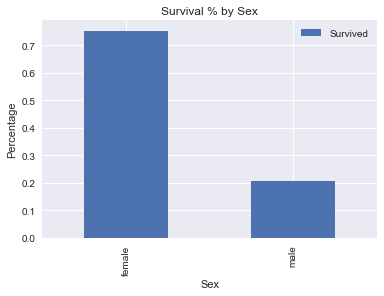

In [103]:
survived_group_sex = titanic_df.groupby(['Sex'])[['Survived']].mean()
survived_group_sex.plot(kind='bar', title = 'Survival % by Sex').set_ylabel('Percentage')
titanic_df.groupby(['Sex'])[['Survived']].describe()

Female survival rate was sooo much higher than male survival even thought in my primary analysis I found that Men were almost double the female population aboard the Titanic. But after seeing this, it totally made sense. When faced with death, society usually wanted the females to survival to protect the future of the species. I thought it would be the same for children as well; however, looking at the data from above describing the age of people on the Titanic, there weren't too many people younger than 20 years of age anyways. I also made a plot of this data just to show how dramatic the difference between the male and female survival was. So many interesting findings! Let's revisit socioeconomic class. 

This time I grouped the data by Sex AND Pclass. I knew that higher class people survived more and that women also survived more, so was there a difference between men and women in different classes and their survival rates?

Survived                                             
                 count      mean       std  min  25%  50%  75%  max
Sex    Pclass                                                      
female 1          83.0  0.963855  0.187784  0.0  1.0  1.0  1.0  1.0
       2          74.0  0.918919  0.274823  0.0  1.0  1.0  1.0  1.0
       3         102.0  0.460784  0.500921  0.0  0.0  0.0  1.0  1.0
male   1         101.0  0.396040  0.491512  0.0  0.0  0.0  1.0  1.0
       2          99.0  0.151515  0.360375  0.0  0.0  0.0  0.0  1.0
       3         253.0  0.150198  0.357973  0.0  0.0  0.0  0.0  1.0

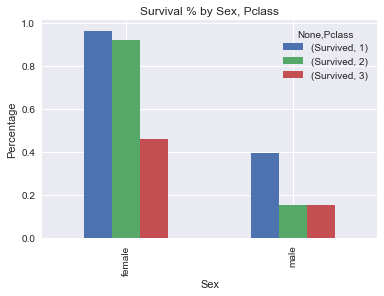

In [104]:
titanic_df.groupby(['Sex', 'Pclass'])[['Survived']].mean().unstack().plot(kind='bar', title = 'Survival % by Sex, Pclass').set_ylabel('Percentage')

titanic_df.groupby(['Sex', 'Pclass'])[['Survived']].describe()


Almost all the women in first class survived! And also with the lowest variability. Almost all the women in second class survived too but with a bit more variability. Only 50% of the women in 3rd class survived, but thats still more likely than even men in 1st class. If you were a man in 2nd or 3rd class you were really unlikely to survive! 

After doing this, I wanted to look at Embarked just for fun =). I grouped the data by Embarked and looked at survival rates.

In [95]:
#survived_group_port = titanic_df.groupby('Embarked')
#print survived_group_port['Survived'].mean()

titanic_df.groupby(['Embarked'])[['Survived']].mean()

,Survived
Embarked,
C,0.607692
Q,0.285714
S,0.362816


Finally I looked at the survival for people that embarked from different ports and oddly enough there seems to be a difference in survival rate from different ports...The variability is really high for all 3 ports though. I can't really come up with any theories as to why these differences happen and I'm not quite sure these differences aren't purely random either. But still interesting nonetheless.

# Conclusion

In conclusion, I think that Pclass and Sex seemed to have some real relationship to survival on the Titanic. I couldn't find anything that led me to believe age was a huge factor. In terms of Embarkment, the data is interesting but still too elementary to make any definitive conclusions about that as well. I am not concluding any causal relationships between any of these factors. Just hypothetical conclusions based on elementary statistical data. I didn't feel like I needed to clean any of the data from the factors that I analyzed. The only piece of information that was missing was 177 people's ages. I discussed this in the Data Wrangling portion of my analysis. The most interesting piece of data I found was definitely when I grouped Sex and Pclass together! I only used Udacity lesson videos and quizzes to complete this project.